# Capstone Project - Car Accident Severity

## Table of contents
* Load the Data
* Data Cleaning
* Feature evaluation - Chi-square Test
* Machine Learning - K-Nearest Neighbors

### Load the Data

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
#load the dataset
df=pd.read_csv("Collisions.csv")
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.392900,47.648646,1,332176,333676,EA40602,Matched,Intersection,26581.0,28TH AVE W AND W DRAVUS ST,...,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
1,-122.284487,47.603308,2,328504,330004,EA10294,Unmatched,Block,NaN,LAKE WASHINGTON BLVD BETWEEN LAKESIDE AVE AND ...,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
2,-122.338480,47.619119,3,329091,330591,EA15604,Matched,Block,NaN,WESTLAKE AVE N BETWEEN DENNY WAY AND JOHN ST,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.358307,47.653110,4,328274,329774,EA07215,Matched,Block,NaN,NW 36TH ST BETWEEN 1ST AVE NW AND LEARY WAY NW,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
4,-122.296519,47.733786,5,329003,330503,E986969,Matched,Intersection,35990.0,30TH AVE NE AND NE 145TH ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


In [3]:
#get a summary of the data
print(df.shape)
df.describe(include = 'all')

(220937, 40)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,213471.000000,213471.000000,220937.000000,220937.000000,220937.000000,220937,220937,217226,71693.000000,216354,...,194557,194389,5186,1.272050e+05,9898,211524,194666,220937.000000,2.209370e+05,220937
unique,NaN,NaN,NaN,NaN,NaN,220934,2,3,NaN,25183,...,9,9,1,NaN,1,63,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,2,194739,144661,NaN,298,...,128092,119082,5186,NaN,9898,44832,44832,NaN,NaN,209021
mean,-122.330751,47.620212,110469.000000,144322.348900,144547.979705,NaN,NaN,NaN,37617.736808,NaN,...,NaN,NaN,NaN,7.971063e+06,NaN,NaN,NaN,261.830888,9.600362e+03,NaN
std,0.030052,0.056025,63779.162549,88807.168877,89178.322408,NaN,NaN,NaN,51915.761657,NaN,...,NaN,NaN,NaN,2.611523e+06,NaN,NaN,NaN,3251.252792,7.154652e+04,NaN
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,-122.349280,47.577331,55235.000000,71521.000000,71521.000000,NaN,NaN,NaN,28653.000000,NaN,...,NaN,NaN,NaN,6.007029e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,-122.330363,47.616078,110469.000000,126958.000000,126958.000000,NaN,NaN,NaN,29973.000000,NaN,...,NaN,NaN,NaN,8.033011e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,-122.311998,47.664261,165703.000000,209168.000000,209388.000000,NaN,NaN,NaN,33983.000000,NaN,...,NaN,NaN,NaN,1.018101e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


### Data Cleaning

In [4]:
#Count missing values in each column
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

X
False    213471
True       7466
Name: X, dtype: int64

Y
False    213471
True       7466
Name: Y, dtype: int64

OBJECTID
False    220937
Name: OBJECTID, dtype: int64

INCKEY
False    220937
Name: INCKEY, dtype: int64

COLDETKEY
False    220937
Name: COLDETKEY, dtype: int64

REPORTNO
False    220937
Name: REPORTNO, dtype: int64

STATUS
False    220937
Name: STATUS, dtype: int64

ADDRTYPE
False    217226
True       3711
Name: ADDRTYPE, dtype: int64

INTKEY
True     149244
False     71693
Name: INTKEY, dtype: int64

LOCATION
False    216354
True       4583
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     120403
False    100534
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     209168
False     11769
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE
False    220936
True          1
Name: SEVERITYCODE, dtype: int64

SEVERITYDESC
False    220937
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    194666
True      26271
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    22

<b>The columns INTKEY, EXCEPTRSNCODE, EXCEPTRSNDESC, INATTENTIONIND, PEDROWNOTGRNT, SPEEDING  have more missing data than cells with data, therefore it is best to drop them from the dataframe.

In [5]:
#drop the above columns
df.drop(["INTKEY", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "INATTENTIONIND", "PEDROWNOTGRNT", "SPEEDING"],1,inplace=True)

In [6]:
#check reduced dataframe
df.shape

(220937, 34)

<b>The aim of this project is to make a model that predicts the severity of a collision based on external conditions, like street and weather conditions. Therefore, only relevant columns (based on the data descirption https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf) will stay in the dataframe.

In [7]:
#get a list of all the column names
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'LOCATION', 'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES',
       'SERIOUSINJURIES', 'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE',
       'SDOT_COLCODE', 'SDOT_COLDESC', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

<b>The variables I believe to be relevant are WEATHER, ROADCOND and LIGHTCOND.

In [8]:
#make a new dataframe with only the columns to be investigated
ndf=df[['WEATHER','ROADCOND','LIGHTCOND','SEVERITYCODE']]
ndf.head()

,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,Overcast,Dry,Daylight,2
1,NaN,NaN,NaN,0
2,Clear,Dry,Daylight,1
3,Raining,Wet,Dark - Street Lights On,1
4,Clear,Dry,Daylight,2


In [9]:
#remove NaNs from ndf
print(ndf.shape)
print("")
ndf.dropna(axis=0, inplace=True)
print(ndf.shape)

(220937, 4)

(194209, 4)


C:\Users\Yannis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
#check the number of cells for each level of each variable, in order to check that everything makes sense
for variable in ndf.columns:
    print(ndf[variable].value_counts())
    print("")

Clear                       114157
Raining                      33975
Overcast                     28460
Unknown                      15079
Snowing                        913
Other                          843
Fog/Smog/Smoke                 576
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               55
Severe Crosswind                26
Partly Cloudy                    9
Name: WEATHER, dtype: int64

Dry               127863
Wet                48634
Unknown            15081
Ice                 1228
Snow/Slush          1009
Other                135
Standing Water       119
Sand/Mud/Dirt         76
Oil                   64
Name: ROADCOND, dtype: int64

Daylight                    119018
Dark - Street Lights On      49969
Unknown                      13502
Dusk                          6061
Dawn                          2596
Dark - No Street Lights       1571
Dark - Street Lights Off      1229
Other                          243
Dark - Unknown Lighting         20
Name: LIGHTCOND,

<b>There is only one case with severity "0" which stands for "unknown severity". This doesn't add and useful information, therefore it will be removed. Additionally, records where WEATHER, ROADCOND and LIGHTCOND were equal to "Unknown" were also removed.

In [11]:
#find the rows with "SEVERITYCODE"==0,"WEATHER"=="Unknown","ROADCOND"=="Unknown","LIGHTCOND"=="Unknown"
i1=ndf[ndf["SEVERITYCODE"]=="0"].index
i2=ndf[ndf["WEATHER"]=="Unknown"].index
i3=ndf[ndf["ROADCOND"]=="Unknown"].index
i4=ndf[ndf["LIGHTCOND"]=="Unknown"].index
i=i1.union(i2).union(i3).union(i4)

#remove the row and check the successful removal
print(ndf.shape)
print("")
ndf.drop(i,inplace=True)
for variable in ndf.columns:
    print(ndf[variable].value_counts())
    print("")
print(ndf.shape)

(194209, 4)

Clear                       112082
Raining                      33586
Overcast                     27749
Snowing                        843
Fog/Smog/Smoke                 562
Other                          274
Sleet/Hail/Freezing Rain       114
Blowing Sand/Dirt               47
Severe Crosswind                26
Partly Cloudy                    9
Name: WEATHER, dtype: int64

Dry               125289
Wet                47675
Ice                 1118
Snow/Slush           854
Other                115
Standing Water       112
Sand/Mud/Dirt         68
Oil                   61
Name: ROADCOND, dtype: int64

Daylight                    115751
Dark - Street Lights On      48359
Dusk                          5831
Dawn                          2518
Dark - No Street Lights       1451
Dark - Street Lights Off      1155
Other                          209
Dark - Unknown Lighting         18
Name: LIGHTCOND, dtype: int64

1     115620
2      56358
2b      2979
3        335
Name: SEVERITYC

C:\Users\Yannis\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<b>This concludes the data cleaning section.

### Feature evaluation - Plots & Chi-square Test

<b> The features to be included in the development of the machine learning algorithms need to be evaluated. Since all the features in the current dataset are categorical the best type of plot for a visual evaluation is a bar plot and the most appropriate statistical test to check the association between SEVERITYCODE with every other variable is the Chi-square test.

In [12]:
#load visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
ndf.columns

Index(['WEATHER', 'ROADCOND', 'LIGHTCOND', 'SEVERITYCODE'], dtype='object')

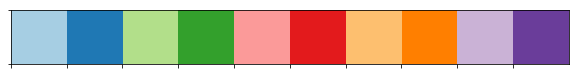

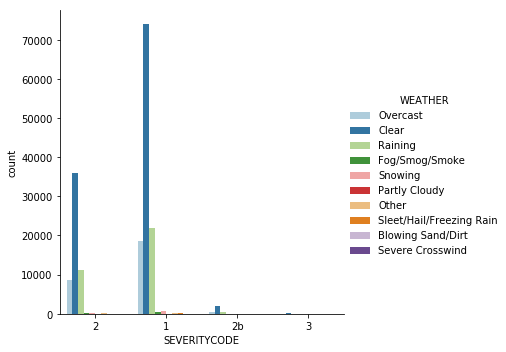

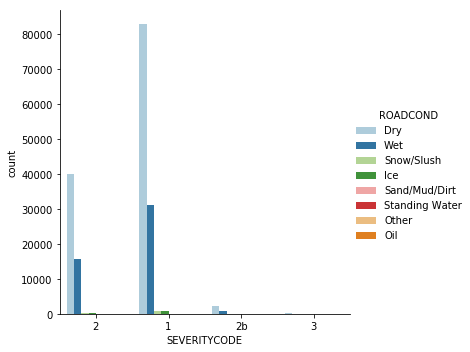

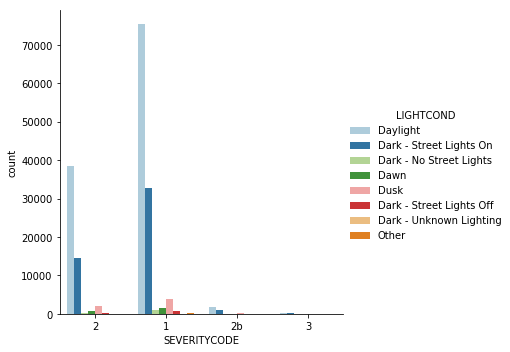

In [14]:
custom_palette = sns.color_palette("Paired", 10)
sns.palplot(custom_palette)
for column in ndf.columns[0:3]:
    plot=sns.catplot(x="SEVERITYCODE",hue=column, kind="count",palette=custom_palette, data=ndf)
    plot.savefig(str(column))
    plot.savefig(str(column)+".pdf")
    

In [15]:
for variable in ndf.columns[:-1]:
    contingency=pd.crosstab(ndf["SEVERITYCODE"],ndf[variable])
    #print(contingency)
    from scipy.stats import chi2_contingency
    chi2, p, dof, expected = chi2_contingency(contingency)
    #print(chi2)
    #print(p)
    if p<0.05:
        print(str(variable)+" should be included in the Machine Learning algorithms")

WEATHER should be included in the Machine Learning algorithms
ROADCOND should be included in the Machine Learning algorithms
LIGHTCOND should be included in the Machine Learning algorithms


### Machine Learning - K-Nearest Neighbors

In [16]:
#Replace the categorical variables with dummy variables
dummy_variables=pd.get_dummies(ndf[ndf.columns[0]])

for variable in ndf.columns[1:-1]:
    dummy_variables=pd.concat([dummy_variables,pd.get_dummies(ndf[variable])],axis=1)

dummy_variables.head()


,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# turn SEVERITYSCORE into a float
print(ndf["SEVERITYCODE"].value_counts())
print("")
ndf["SEVERITYCODE"]=ndf["SEVERITYCODE"].replace(["1"],1)
ndf["SEVERITYCODE"]=ndf["SEVERITYCODE"].replace(["2"],2)
ndf["SEVERITYCODE"]=ndf["SEVERITYCODE"].replace(["3"],4)
ndf["SEVERITYCODE"]=ndf["SEVERITYCODE"].replace(["2b"],3)
print(ndf["SEVERITYCODE"].value_counts())

1     115620
2      56358
2b      2979
3        335
Name: SEVERITYCODE, dtype: int64



C:\Users\Yannis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Yannis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Yannis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

1    115620
2     56358
3      2979
4       335
Name: SEVERITYCODE, dtype: int64


C:\Users\Yannis\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [18]:
#make dataframe to be used for the development of the machine learing algorithm
ml_df=pd.concat([dummy_variables,ndf["SEVERITYCODE"]],axis=1)
print(ml_df.dtypes)
ml_df.head()

Blowing Sand/Dirt           uint8
Clear                       uint8
Fog/Smog/Smoke              uint8
Other                       uint8
Overcast                    uint8
Partly Cloudy               uint8
Raining                     uint8
Severe Crosswind            uint8
Sleet/Hail/Freezing Rain    uint8
Snowing                     uint8
Dry                         uint8
Ice                         uint8
Oil                         uint8
Other                       uint8
Sand/Mud/Dirt               uint8
Snow/Slush                  uint8
Standing Water              uint8
Wet                         uint8
Dark - No Street Lights     uint8
Dark - Street Lights Off    uint8
Dark - Street Lights On     uint8
Dark - Unknown Lighting     uint8
Dawn                        uint8
Daylight                    uint8
Dusk                        uint8
Other                       uint8
SEVERITYCODE                int64
dtype: object


,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,SEVERITYCODE
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [19]:
ml_df.columns

Index(['Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Other', 'Overcast',
       'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil', 'Other',
       'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Other', 'SEVERITYCODE'],
      dtype='object')

In [20]:
#Define feature variables X:

X=ml_df[ml_df.columns[:-1]].values
X[0:5]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=uint8)

In [21]:
#Define target variable (or labels) y:

y=ml_df["SEVERITYCODE"].values
y[0:5]

array([2, 1, 1, 2, 1], dtype=int64)

In [22]:
#split the dataset into train set and test set, which will be 20% off the available labelled records

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (140233, 32) (140233,)
Test set: (35059, 32) (35059,)


In [23]:
#import library for K-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [24]:
#run K-NN with different Ks (50) in order to find the best K

Ks =50
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.49020223, 0.6364129 , 0.63507231, 0.64551185, 0.64143301,
       0.64816452, 0.64756553, 0.64793634, 0.64006389, 0.64428535,
       0.64408568, 0.65455375, 0.65435409, 0.65475342, 0.65452523,
       0.66031547, 0.64987592, 0.64970478, 0.65007559, 0.65007559,
       0.65010411, 0.65010411, 0.65061753, 0.65061753, 0.65061753,
       0.61855729, 0.65001854, 0.65041787, 0.65093129, 0.6291965 ,
       0.62965287, 0.62973844, 0.62970992, 0.62976696, 0.66125674,
       0.66125674, 0.66128526, 0.66125674, 0.66125674, 0.66125674,
       0.66125674, 0.66125674, 0.66125674, 0.66125674, 0.66125674,
       0.66125674, 0.66134231, 0.66125674, 0.66125674])

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

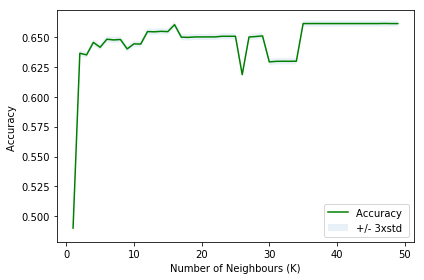

In [46]:
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.savefig('K-NN Accuracy.pdf')
plt.savefig('K-NN Accuracy.png')
plt.show()

In [27]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6613423086796543 with k= 47


<b>So the best K-NN algorithm is the one with k=47, which achieved an accurary of 66%.

In [28]:
#import libraries for the 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [29]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train,y_train)
knn_pred=neigh.predict(X_test)
jc1=jaccard_similarity_score(y_test, knn_pred)
fs1=f1_score(y_test, knn_pred, average='weighted')
print(jc1)
print(fs1)

0.6613423086796543
0.5266195212646884


C:\Users\Yannis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Machine Learning - Decision Tree

In [30]:
#import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree

In [31]:
#decision tree modelling
Tree = DecisionTreeClassifier(criterion="entropy")
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
#train the model
Tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
#make predictions
predTree = Tree.predict(X_test)

In [34]:
#compare predictions to te actual values
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[1 1 2 1 2]


In [35]:
#evaluation of decision tree
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6610855985624233


In [36]:
#get evaluation metrics
jc2=jaccard_similarity_score(y_test, predTree)
print(jc2)
fs2=f1_score(y_test, predTree, average='weighted')
print(fs2)

0.6610855985624233
0.5267235060329485


C:\Users\Yannis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Machine Learning - Logistic Regression

In [37]:
#import Logistic Regression libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [40]:
#train Logistic Regression Algorrithm
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
#Predictions
log_pred=LR.predict(X_test)
log_pred_prob=LR.predict_proba(X_test)
print(log_pred[0:5])
print(log_pred_prob[0:5])

[1 1 1 1 1]
[[0.63116534 0.35137335 0.01441647 0.00304484]
 [0.65190446 0.32988063 0.01572637 0.00248854]
 [0.63116534 0.35137335 0.01441647 0.00304484]
 [0.63116534 0.35137335 0.01441647 0.00304484]
 [0.63116534 0.35137335 0.01441647 0.00304484]]


In [42]:
#Evaluation
from sklearn.metrics import log_loss
jc3=jaccard_similarity_score(y_test, log_pred)
fs3=f1_score(y_test, log_pred, average='weighted')  
ll3=log_loss(y_test, log_pred_prob)
print(jc3)
print(fs3)
print(ll3)

0.6612567386405773
0.5264213101165655
0.7206684645853518


C:\Users\Yannis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Machine Learning - Summary

In [44]:
list_jc = [jc1, jc2, jc3]
list_fs = [fs1, fs2, fs3]
list_ll = ['NA', 'NA', ll3]
sum_table= pd.DataFrame(list_jc, index=['KNN','Decision Tree','Logistic Regression'])
sum_table.columns = ['Jaccard']
sum_table.insert(loc=1, column='F1-score', value=list_fs)
sum_table.insert(loc=2, column='LogLoss', value=list_ll)
sum_table.columns.name = 'Algorithm'
sum_table

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.661342,0.526620,NA
Decision Tree,0.661086,0.526724,NA
Logistic Regression,0.661257,0.526421,0.720668


<b>This concludes the notebook